A. Chargement des données

In [59]:
import pandas as pd
df = pd.read_csv('../data/creditcard_clean.csv')

B. Préparation des données pour la modélisation

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

C. Gérer le déséquilibre de classes

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

D. Teste avec XGBClassifier

In [65]:
# XGBoost
from xgboost import XGBClassifier

scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)

E. Fit, prédiction, évaluation avec XGBoost 

In [67]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))
print('AUPRC:', average_precision_score(y_test, y_proba))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9682378578893572
AUPRC: 0.8800038893818777
Confusion matrix:
 [[56853    11]
 [   16    82]]


F. Prédire et évaluer les résultats
    Prédictions sur le test set
    Calcul des métriques : précision, rappel, F1-score, AUC ROC, AUPRC (area under precision-recall curve)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))
print('AUPRC:', average_precision_score(y_test, y_proba))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.952908497036969
AUPRC: 0.8541999432510914
Confusion matrix:
 [[56861     3]
 [   25    73]]


G. Prédire et évaluer les résultats
    Courbe Precision-Recall (AUPRC)

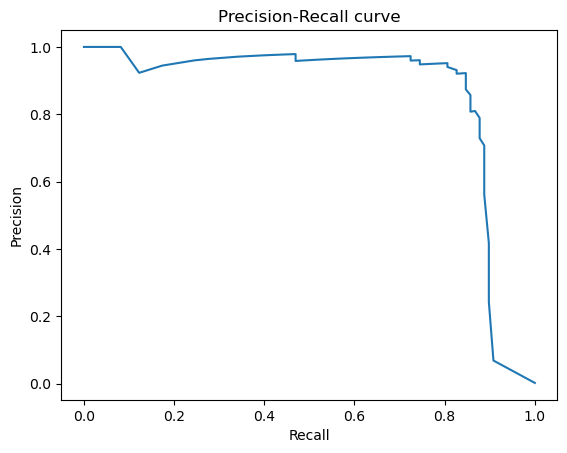

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

H. Sauvegarde du modèle

In [77]:
import joblib
joblib.dump(clf, '../models/randomforest_fraude.pkl')

['../models/randomforest_fraude.pkl']